## Project 1: NASA's hazardous objects


# Potentialy Hazardous Objects

Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid’s potential to make threatening close approaches to the Earth. Specifically, all asteroids with a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs (Jet Propulsion Laboratory, NASA).

An astronomical unit is the average distance between the Earth and the Sun, meaning that 0.05 au 7.5 Million Km

The Absolute Magnitude is a measure of the luminosity of a celestial body on a inverse logaritmic scale. i.e. Venus has a magnitude of -5, Jupiter has a luminosity of -3, Pluton have a magnitude of 14, meanwhile the small asteroids have a magitud above 22.

We will be focusoing on the objects with a proximity equal or less than 0.05 au and a magnitude below 22.

In [1]:
# Dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import csv 


In [2]:
# Data files
objects_path = "./neo_v2.csv"


# Read the data 
objects_data = pd.read_csv(objects_path)
objects_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
len(objects_data)

90836

In [4]:
n = objects_data['id'].nunique()
n

27423

In [5]:
unique_df = objects_data.groupby(by = 'id')['miss_distance'].min().reset_index()
unique_df.head()
x = unique_df['id'].nunique()


In [6]:
unique_objects_df = pd.merge(unique_df, objects_data, how = 'inner', on = ['id', 'miss_distance'])
unique_objects_df


,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2000433,2.672952e+07,433 Eros (A898 PA),23.043847,51.527608,21402.705247,Earth,False,10.310,False
1,2000719,4.258288e+07,719 Albert (A911 TB),2.044349,4.571303,27551.597194,Earth,False,15.570,False
2,2001036,5.372124e+07,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,Earth,False,9.230,False
3,2001566,8.053782e+06,1566 Icarus (1949 MA),1.427431,3.191832,108801.296374,Earth,False,16.350,True
4,2001580,3.557394e+07,1580 Betulia (1950 KA),3.065879,6.855513,105157.775851,Earth,False,14.690,False
...,...,...,...,...,...,...,...,...,...,...
27418,54275849,2.211065e+07,(2022 GL5),0.199965,0.447136,97087.784087,Earth,False,20.618,False
27419,54275852,1.781882e+07,(2022 GO5),0.045264,0.101214,27826.213807,Earth,False,23.844,False
27420,54275853,9.777491e+06,(2022 GP5),0.056022,0.125268,42604.694355,Earth,False,23.381,False
27421,54275865,1.895127e+04,(2022 GQ5),0.001227,0.002744,51054.089177,Earth,False,31.678,False


In [7]:
unique_objects_df.drop(columns = ['orbiting_body', 'sentry_object'], inplace = True)
unique_objects_df.to_csv("./unique_objects.csv", index_label="index")

### Statistics 

In [8]:
miss_s = unique_objects_df['miss_distance'].agg(['mean', 'median', 'var', 'std', 'sem'])
miss_s

mean      1.770540e+07
median    1.145114e+07
var       2.972905e+14
std       1.724212e+07
sem       1.041197e+05
Name: miss_distance, dtype: float64

In [9]:
velocity_s = unique_objects_df['relative_velocity'].agg(['mean', 'median', 'var', 'std', 'sem'])
velocity_s

mean      4.285946e+04
median    3.792331e+04
var       5.709828e+08
std       2.389525e+04
sem       1.442959e+02
Name: relative_velocity, dtype: float64

In [10]:
magnitude_s = unique_objects_df['absolute_magnitude'].agg(['mean', 'median', 'var', 'std', 'sem'])
magnitude_s

mean      23.361668
median    23.600000
var        8.236446
std        2.869921
sem        0.017331
Name: absolute_magnitude, dtype: float64

In [11]:
dia_min_s =  unique_objects_df['est_diameter_min'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_min_s

mean      0.139082
median    0.050647
var       0.140191
std       0.374420
sem       0.002261
Name: est_diameter_min, dtype: float64

In [12]:
dia_max_s =  unique_objects_df['est_diameter_max'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_max_s

mean      0.310996
median    0.113250
var       0.700953
std       0.837229
sem       0.005056
Name: est_diameter_max, dtype: float64

In [13]:
summary_df = pd.DataFrame({
    'miss_distance' : miss_s,
    'relative_velocity' : velocity_s,
    'absolute_magnitude' : magnitude_s,
    'est_diameter_min' : dia_min_s,
    'est_diameter_max' : dia_max_s,
})
summary_df

,miss_distance,relative_velocity,absolute_magnitude,est_diameter_min,est_diameter_max
mean,1.770540e+07,4.285946e+04,23.361668,0.139082,0.310996
median,1.145114e+07,3.792331e+04,23.600000,0.050647,0.113250
var,2.972905e+14,5.709828e+08,8.236446,0.140191,0.700953
std,1.724212e+07,2.389525e+04,2.869921,0.374420,0.837229
sem,1.041197e+05,1.442959e+02,0.017331,0.002261,0.005056


### Graphs
- Pie: hazardous Y
- Pie: % of objects in the distance rangs
- Pie: % of objects in the magnitude range
- Bar: % of objects belonging in the distance range are Hazardous
- Bar: % of objects belonging in the Magnitude range are Hazardous
- Scatter: The relationship between the objects in the ditance ragne and the magnitude range
- Box (complete df): Variation in the distance and the Magnitude population
- Box (true df): Variation in the distance and the Magnitude Sample


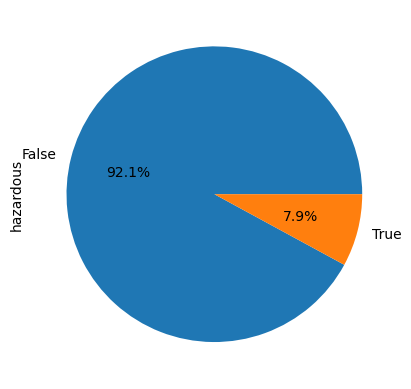

In [14]:
hazardous = unique_objects_df['hazardous'].value_counts()
hazardous.plot.pie(autopct = '%1.1f%%')
plt.show()

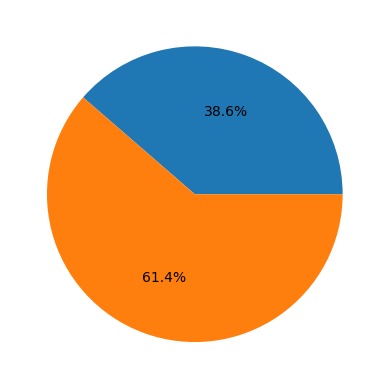

In [24]:
distance_true = unique_objects_df[unique_objects_df['miss_distance'] <= 7500000].value_counts()
distance_false = unique_objects_df[unique_objects_df['miss_distance'] >= 7500000].value_counts()

dist_true_len = len(distance_true)
dist_false_len = len(distance_false)
distance = [dist_true_len, dist_false_len]

magnitude_true = unique_objects_df[unique_objects_df['absolute_magnitude'] <= 22].value_counts()
magnitude_false = unique_objects_df[unique_objects_df['absolute_magnitude'] >= 22].value_counts()

mag_true_len = len(magnitude_true)
mag_false_len = len(magnitude_false)
magnitude = [mag_true_len, mag_false_len]

plt.pie(distance, autopct = '%1.1f%%')
plt.pie(magnitude, autopct = '%1.1f%%')
plt.show()

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, y_lr, color = 'red')
plt.xlabel('Lat')
plt.ylabel(additional)
plt.title(f'y = {slope:.4f} * x + {intercept:.4f}', color = 'red')
plt.show()